## Imports

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Constants

In [7]:
IMG_PATH = "/Users/jthomas/Code/DataScienceSIG/furniture-detector/img/val/bed/00000901.jpg"

WEIGHTS_PATH = "/Users/jthomas/Code/DataScienceSIG/ImageClassification_AtHome/furniture_classifier.h5"
CLASS_MAP = {0:'bed', 1:'chair', 2:'sofa', 3:'swivelchair', 4:'table'}
IMG_HEIGHT = 150

## Load Image

In [3]:
# load image from file
raw_image = load_img(IMG_PATH, target_size=(IMG_HEIGHT, IMG_HEIGHT))
# convert the image pixels to a numpy array
image = img_to_array(raw_image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

## Initialize Model and Load Weights

In [4]:
input_shape = (IMG_HEIGHT, IMG_HEIGHT, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

model.load_weights(WEIGHTS_PATH)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Perform Prediction

In [6]:
predictions = model.predict(image)[0]
prediction_index = np.argmax(predictions)
predicted_class = CLASS_MAP[prediction_index]
predicted_confidence = np.max(predictions)



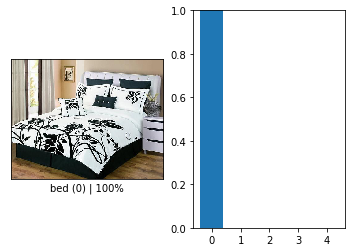

In [12]:
# predictions = [1.0, 0, 0, 0, 0]
# predicted_class = 'bed'
# predicted_confidence = 1
# prediction_index = 0

plt_img = Image.open(IMG_PATH)
num_classes = len(predictions)

plt.figure()
#Image with classification
plt.subplot(1, 2, 1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(plt_img)
plt.xlabel(f'{predicted_class} ({prediction_index}) | {predicted_confidence * 100}%')
#Graph of prediction confidences
plt.subplot(1, 2, 2)
plt.xticks(range(num_classes), CLASS_MAP.keys())
plt.ylim([0,1])
plt.bar(range(num_classes), predictions)

plt.show()